In [1]:
import xarray as xr
import numpy as np

In [2]:
def create_dummy_dataset(n=20, time=0):
    return xr.DataArray(
        np.random.normal(size=(1, n)),
        dims=("t", "x"),
        name="data",
        coords={
            "t": [time, ],
            "x": np.arange(n),
        },
    ).to_dataset()

In [3]:
ds = create_dummy_dataset()

In [4]:
ds

<xarray.Dataset>
Dimensions:  (t: 1, x: 20)
Coordinates:
  * t        (t) int64 0
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    data     (t, x) float64 -0.0003239 0.1365 -0.6035 ... -1.634 0.6313 0.5929

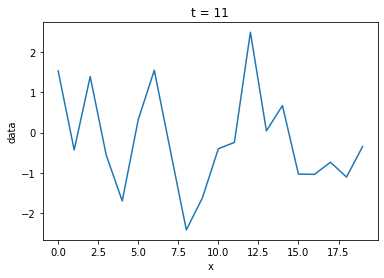

In [28]:
ds.data.plot()

In [5]:
!mkdir -p data/
!rm -f data/*.nc

In [6]:
for n in range(10):
    for t in range(12):
        ds = create_dummy_dataset(time=t)
        fname = f"data/data_e{n:02d}_t{t:02d}.nc"
        print(fname)
        ds.to_netcdf(fname)

data/data_e00_t00.nc
data/data_e00_t01.nc
data/data_e00_t02.nc
data/data_e00_t03.nc
data/data_e00_t04.nc
data/data_e00_t05.nc
data/data_e00_t06.nc
data/data_e00_t07.nc
data/data_e00_t08.nc
data/data_e00_t09.nc
data/data_e00_t10.nc
data/data_e00_t11.nc
data/data_e01_t00.nc
data/data_e01_t01.nc
data/data_e01_t02.nc
data/data_e01_t03.nc
data/data_e01_t04.nc
data/data_e01_t05.nc
data/data_e01_t06.nc
data/data_e01_t07.nc
data/data_e01_t08.nc
data/data_e01_t09.nc
data/data_e01_t10.nc
data/data_e01_t11.nc
data/data_e02_t00.nc
data/data_e02_t01.nc
data/data_e02_t02.nc
data/data_e02_t03.nc
data/data_e02_t04.nc
data/data_e02_t05.nc
data/data_e02_t06.nc
data/data_e02_t07.nc
data/data_e02_t08.nc
data/data_e02_t09.nc
data/data_e02_t10.nc
data/data_e02_t11.nc
data/data_e03_t00.nc
data/data_e03_t01.nc
data/data_e03_t02.nc
data/data_e03_t03.nc
data/data_e03_t04.nc
data/data_e03_t05.nc
data/data_e03_t06.nc
data/data_e03_t07.nc
data/data_e03_t08.nc
data/data_e03_t09.nc
data/data_e03_t10.nc
data/data_e03

In [7]:
from pathlib import Path

In [8]:
file_names = sorted(Path("data/").glob("data_e??_t??.nc"))
display(file_names)

[PosixPath('data/data_e00_t00.nc'),
 PosixPath('data/data_e00_t01.nc'),
 PosixPath('data/data_e00_t02.nc'),
 PosixPath('data/data_e00_t03.nc'),
 PosixPath('data/data_e00_t04.nc'),
 PosixPath('data/data_e00_t05.nc'),
 PosixPath('data/data_e00_t06.nc'),
 PosixPath('data/data_e00_t07.nc'),
 PosixPath('data/data_e00_t08.nc'),
 PosixPath('data/data_e00_t09.nc'),
 PosixPath('data/data_e00_t10.nc'),
 PosixPath('data/data_e00_t11.nc'),
 PosixPath('data/data_e01_t00.nc'),
 PosixPath('data/data_e01_t01.nc'),
 PosixPath('data/data_e01_t02.nc'),
 PosixPath('data/data_e01_t03.nc'),
 PosixPath('data/data_e01_t04.nc'),
 PosixPath('data/data_e01_t05.nc'),
 PosixPath('data/data_e01_t06.nc'),
 PosixPath('data/data_e01_t07.nc'),
 PosixPath('data/data_e01_t08.nc'),
 PosixPath('data/data_e01_t09.nc'),
 PosixPath('data/data_e01_t10.nc'),
 PosixPath('data/data_e01_t11.nc'),
 PosixPath('data/data_e02_t00.nc'),
 PosixPath('data/data_e02_t01.nc'),
 PosixPath('data/data_e02_t02.nc'),
 PosixPath('data/data_e02_t0

In [9]:
ensemble_ids = sorted(set(map(lambda fn: fn.name.split("_")[1], file_names)))
ensemble_ids

['e00', 'e01', 'e02', 'e03', 'e04', 'e05', 'e06', 'e07', 'e08', 'e09']

In [10]:
ensemble_members = [
    xr.open_mfdataset(
        list(filter(lambda fn: ens in fn.name, file_names)),
        chunks={"x": 10},
    )
    for ens in ensemble_ids
]

In [11]:
ds_combined = xr.concat(ensemble_members, dim="ens")
ds_combined = ds_combined.assign_coords(ens=ensemble_ids)
ds_combined

<xarray.Dataset>
Dimensions:  (t: 12, x: 20, ens: 10)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * ens      (ens) <U3 'e00' 'e01' 'e02' 'e03' 'e04' ... 'e06' 'e07' 'e08' 'e09'
Data variables:
    data     (ens, t, x) float64 dask.array<chunksize=(1, 1, 10), meta=np.ndarray>

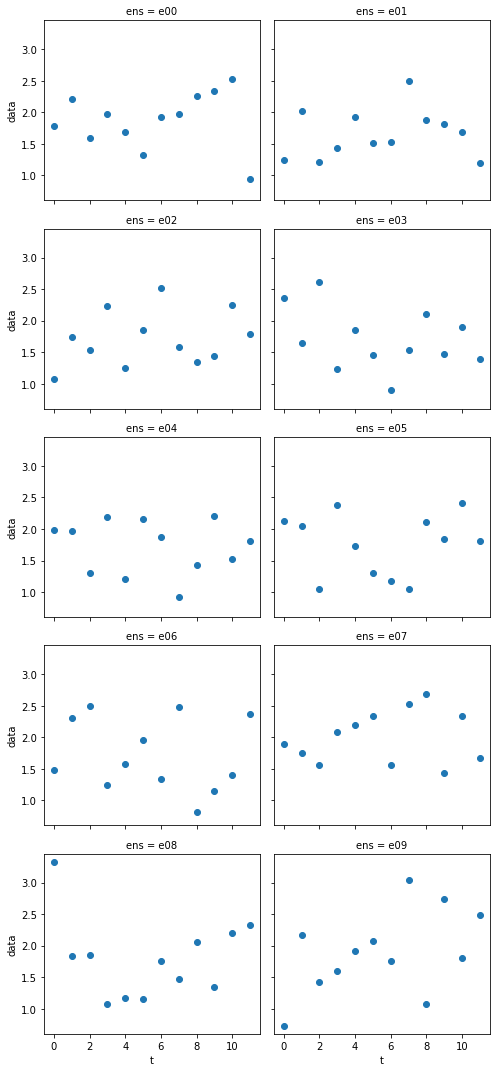

In [34]:
ds_combined.max("x").plot.scatter(x="t", y="data", col="ens", col_wrap=2)

In [35]:
ds_combined = ds_combined.assign_coords(maxdata=ds_combined.data.max("x"))
ds_combined

<xarray.Dataset>
Dimensions:  (t: 12, x: 20, ens: 10)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * ens      (ens) <U3 'e00' 'e01' 'e02' 'e03' 'e04' ... 'e06' 'e07' 'e08' 'e09'
    maxdata  (ens, t) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
Data variables:
    data     (ens, t, x) float64 dask.array<chunksize=(1, 1, 10), meta=np.ndarray>

(array([ 5., 15., 19., 19., 24., 17., 16.,  3.,  1.,  1.]),
 array([0.73309523, 0.99253142, 1.25196762, 1.51140381, 1.77084001,
        2.0302762 , 2.2897124 , 2.54914859, 2.80858479, 3.06802098,
        3.32745718]),
 <BarContainer object of 10 artists>)

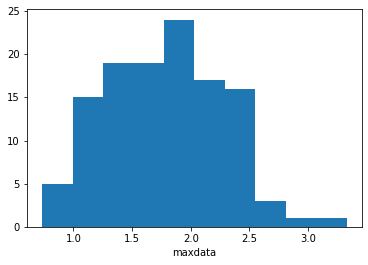

In [38]:
ds_combined.maxdata.compute().plot.hist()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


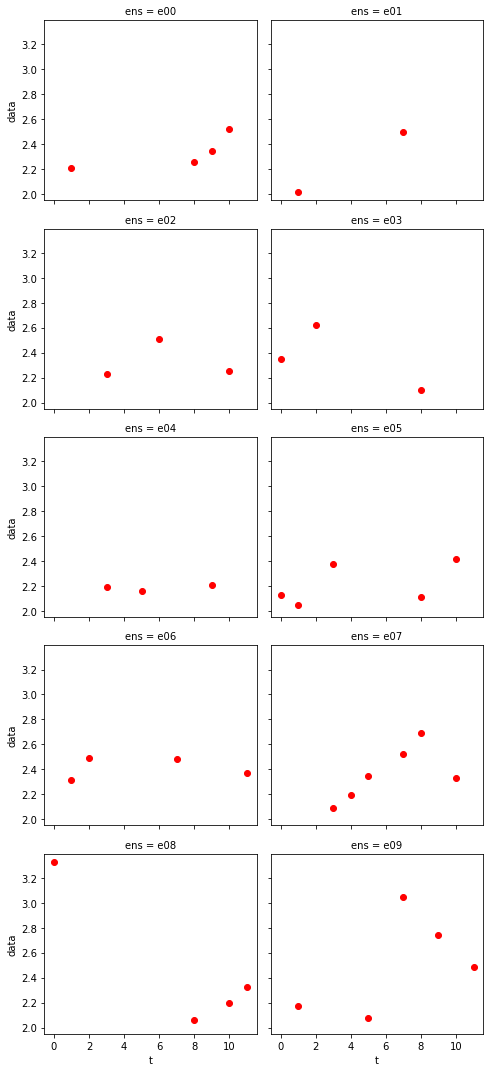

In [43]:
ds_combined.where(ds_combined.maxdata > 2).max("x").plot.scatter(x="t", y="data", col="ens", color="r", col_wrap=2)

In [12]:
ds_combined.sel(ens="e07")

<xarray.Dataset>
Dimensions:  (t: 12, x: 20)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    ens      <U3 'e07'
Data variables:
    data     (t, x) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>

In [13]:
print(ds_combined.nbytes / 1e6, "MiB")

0.019576 MiB


In [14]:
# ds_combined = ds_combined.compute()
# ds_combined

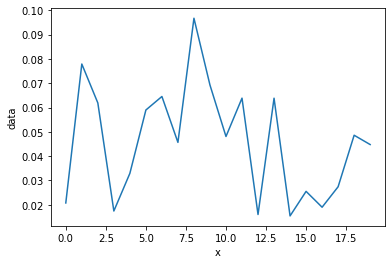

In [15]:
ds_combined.data.std("ens").var("t").plot()

In [19]:
ds_combined.data.rolling(t=7).mean().compute()

<xarray.DataArray 'data' (ens: 10, t: 12, x: 20)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01887196, -0.22347895,  0.01893186, ...,  0.1959525 ,
         -0.47542417, -0.06163633],
        [ 0.14173037, -0.40648393,  0.1458937 , ..., -0.12852964,
         -0.64949631,  0.13246177],
        [ 0.27594926, -0.19146333,  0.37619816, ..., -0.48018552,
         -0.49419294,  0.45009418]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.43198972,  0.04816316,  0.16956399, ..., -0.08952219,
         -0.6971096 , -0.88049485],
        [ 0.2428391 ,  0.07997361,  0.19264123, ..., -0.09191598,
         -0.49616148, -0.67836676],
        [ 0.20450605,  0.11837099,  0.07220907, ..., -0.01377326,
         -0.43428821, -0.28741723]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.19796814, -0.08484948, -0.52539102, ...,  0.20195485,
         -0.24615908,  0.38038821],
        [ 0.35743943,  0.16076846, -0.69828166, ...,  0.47538014,
         -0.41261986,  0.29064177],
        [ 0.46364989,  0.15321446, -0.31957301, ...,  0.45831084,
         -0.50996039,  0.39949668]]])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * ens      (ens) <U3 'e00' 'e01' 'e02' 'e03' 'e04' ... 'e06' 'e07' 'e08' 'e09'

In [20]:
ds_combined.data

<xarray.DataArray 'data' (ens: 10, t: 12, x: 20)>
dask.array<concatenate, shape=(10, 12, 20), dtype=float64, chunksize=(1, 1, 10), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * ens      (ens) <U3 'e00' 'e01' 'e02' 'e03' 'e04' ... 'e06' 'e07' 'e08' 'e09'

In [27]:
ds_combined.data.chunk({"x": 2, "t": -1})

<xarray.DataArray 'data' (ens: 10, t: 12, x: 20)>
dask.array<rechunk-merge, shape=(10, 12, 20), dtype=float64, chunksize=(1, 12, 2), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * ens      (ens) <U3 'e00' 'e01' 'e02' 'e03' 'e04' ... 'e06' 'e07' 'e08' 'e09'

# Scalcs

In [17]:
# 128 GB Memory
# 16 vCPU
128 / 16  # GB / CPU

8.0

In [44]:
%conda list

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
abseil-cpp                20210324.2           h9c3ff4c_0    conda-forge
adal                      1.2.7              pyhd8ed1ab_0    conda-forge
adlfs                     2022.7.0           pyhd8ed1ab_0    conda-forge
affine                    2.3.1              pyhd8ed1ab_0    conda-forge
aiobotocore               2.3.4              pyhd8ed1ab_0    conda-forge
aiohttp                   3.8.1            py39hb9d737c_1    conda-forge
aioitertools              0.10.0             pyhd8ed1ab_0    conda-forge
aiosignal                 1.2.0              pyhd8ed1ab_0    conda-forge
alembic                   1.8.1              pyhd8ed1ab_0    conda-forge
anyio                     3.6.1            py39hf3d152e_0    conda-forge
